## Árboles de Regresión con X = Proline y y = tipo
Introducción
En este análisis, aplicaremos un árbol de regresión para modelar la relación entre la variable predictora Proline y la variable objetivo tipo. Aunque la variable 'tipo' es categórica (representa el tipo de vino), seguiremos adelante con el enfoque de regresión según tu solicitud.

Importamos las librerías necesarias para manipulación de datos, visualización y modelado. Configuramos el entorno para mostrar gráficas dentro del notebook y suprimimos advertencias para mantener el output limpio.

In [1]:
# Importación de librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Preprocesado y modelado
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Configuración para mostrar gráficas en Jupyter
%matplotlib inline

# Ignorar warnings
warnings.filterwarnings('ignore')


Cargamos el conjunto de datos 'wine.xlsx' y mostramos las primeras filas para verificar que se haya cargado correctamente.

In [2]:
# Cargar el conjunto de datos
df = pd.read_excel('wine.xlsx')

# Mostrar las primeras filas
df.head()


,tipo,alcohol,acido_malico,ceniza,alcalinidad,magnesio,fenoles_totales,flavanoids,no_flavonoides,Proantocianinas,intensi_color,tono,diluidos,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# Entendiendo la Estructura de los Datos

Verificamos el tipo de datos en cada columna y confirmamos que no hay valores nulos.

In [3]:
# Información del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tipo             178 non-null    int64  
 1   alcohol          178 non-null    float64
 2   acido_malico     178 non-null    float64
 3   ceniza           178 non-null    float64
 4   alcalinidad      178 non-null    float64
 5   magnesio         178 non-null    int64  
 6   fenoles_totales  178 non-null    float64
 7   flavanoids       178 non-null    float64
 8   no_flavonoides   178 non-null    float64
 9   Proantocianinas  178 non-null    float64
 10  intensi_color    178 non-null    float64
 11  tono             178 non-null    float64
 12  diluidos         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


## Resumen Estadístico

Obtenemos estadísticas descriptivas para comprender la distribución de las variables numéricas.

In [4]:
# Estadísticas descriptivas
df.describe()

,tipo,alcohol,acido_malico,ceniza,alcalinidad,magnesio,fenoles_totales,flavanoids,no_flavonoides,Proantocianinas,intensi_color,tono,diluidos,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## Definición de Variables Predictoras y Objetivo

Seleccionamos 'Proline' como la única variable predictora y 'tipo' como la variable objetivo que queremos predecir.

In [18]:
# Definir X y y según tu solicitud
X = df[['flavanoids']]  # Variable predictora
y = df['acido_malico']       # Variable objetivo

## División de Datos en Entrenamiento y Prueba

Dividimos los datos en conjuntos de entrenamiento y prueba para evaluar el rendimiento del modelo en datos no vistos.

In [19]:
# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

## Visualización de la Relación entre Proline y Tipo

Este gráfico muestra cómo se distribuyen los tipos de vino en función de los valores de 'Proline'. Podemos observar si hay patrones o tendencias que el modelo podría capturar.

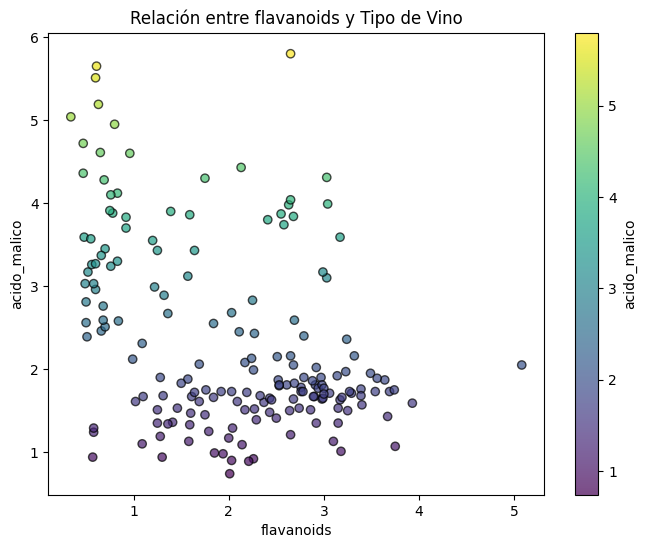

In [20]:
# Gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(X['flavanoids'], y, c=y, cmap='viridis', edgecolor='k', alpha=0.7)
plt.xlabel('flavanoids')
plt.ylabel('acido_malico')
plt.title('Relación entre flavanoids y Tipo de Vino')
plt.colorbar(label='acido_malico')
plt.show()